In [ ]:
# All imports
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Mount drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


This is to format the data from the Greenhouse emission in to three final Data Frame. To then use them to create graphs and edit other Data Frame. df_greenhouse_final_canada_population is the emission of the househole, df_greenhouse_final_provinces is the emission of each province, and df_greenhouse_final_canada_all is the emission of the whole canada (2009-2019).

In [ ]:
# Creating Data Frame for Greenhouse
greenhouse_path = '/content/drive/MyDrive/DawsCon2023DJC/3810009701_databaseLoadingData.csv'

df_greenhouse = pd.read_csv(greenhouse_path)
df_greenhouse_no_name = df_greenhouse[['REF_DATE','GEO','VALUE','UOM','Sector']]

df_greenhouse_renamed = df_greenhouse_no_name.rename(columns={'REF_DATE':'DATE','GEO':'PROVINCE','UOM':'UNIT','Sector':'SECTOR'})

df_greenhouse_canada = df_greenhouse_renamed[
    (df_greenhouse_renamed['PROVINCE'] == 'Canada')
    &
    (df_greenhouse_renamed['SECTOR'] == 'Total, industries and households')
]
df_greenhouse_canada_population = df_greenhouse_renamed[
    (df_greenhouse_renamed['PROVINCE'] == 'Canada')
    &
    (df_greenhouse_renamed['SECTOR'] == 'Total, households')
]
df_greenhouse_provinces_total = df_greenhouse_renamed[
    (df_greenhouse_renamed['PROVINCE'] != 'Canada')
    &
    (df_greenhouse_renamed['SECTOR'] == ('Total, industries and households'))
]

df_greenhouse_provinces_house = df_greenhouse_renamed[
    (df_greenhouse_renamed['PROVINCE'] != 'Canada')
    &
    (df_greenhouse_renamed['SECTOR'] == ('Total, households'))
]



df_greenhouse_final_canada_all = df_greenhouse_canada[['DATE','PROVINCE','VALUE','UNIT']]
df_greenhouse_final_canada_population = df_greenhouse_canada_population[['DATE','PROVINCE','VALUE','UNIT']]
df_greenhouse_final_provinces = df_greenhouse_provinces_total[['DATE','PROVINCE','VALUE','UNIT']]
df_greenhouse_provinces_house = df_greenhouse_provinces_house[['DATE','PROVINCE','VALUE','UNIT']]

# Final Data Frame
df_greenhouse_final_provinces
df_greenhouse_final_canada_population
df_greenhouse_final_canada_all

,DATE,PROVINCE,VALUE,UNIT
0,2009,Canada,742597,Kilotonnes
1,2010,Canada,756849,Kilotonnes
2,2011,Canada,768470,Kilotonnes
3,2012,Canada,768717,Kilotonnes
4,2013,Canada,778221,Kilotonnes
5,2014,Canada,779287,Kilotonnes
6,2015,Canada,783999,Kilotonnes
7,2016,Canada,757922,Kilotonnes
8,2017,Canada,772903,Kilotonnes
9,2018,Canada,788071,Kilotonnes


This is to format the data from the Population of Canada in to two final Data Frame. To then use them to create graphs and edit other Data Frame. df_population_final_canada has the total population of canada by the years (2009-2019). df_population_final_province has the total population per provinces by the years (2009-2019).

In [ ]:
# Creating Data Frame for Population
population_path = '/content/drive/MyDrive/DawsCon2023DJC/1710000901_databaseLoadingData_2.csv'

df_population = pd.read_csv(population_path)
df_population_formated = df_population[['REF_DATE','GEO','VALUE','UOM']]

bool_table_df_population = df_population_formated["REF_DATE"].str.split("-").apply(lambda x: x[1])=='01'
df_population_date_no_trim = df_population_formated[bool_table_df_population]

trim_date = lambda x: str(x).split('-')[0]
df_population_no_name = df_population_date_no_trim.applymap(trim_date)

df_population_final_all = df_population_no_name.rename(columns={'REF_DATE':'DATE','GEO':'PROVINCE','UOM':'UNIT'})

df_population_final_province = df_population_final_all[df_population_final_all['PROVINCE'] != 'Canada']

df_population_final_canada = df_population_final_all[df_population_final_all['PROVINCE'] == 'Canada']



# Final Data Frame
df_population_final_canada
df_population_final_province

,DATE,PROVINCE,VALUE,UNIT
44,2009,Newfoundland and Labrador,514223,Persons
48,2010,Newfoundland and Labrador,520283,Persons
52,2011,Newfoundland and Labrador,523726,Persons
56,2012,Newfoundland and Labrador,526215,Persons
60,2013,Newfoundland and Labrador,527248,Persons
...,...,...,...,...
596,2015,Nunavut,36219,Persons
600,2016,Nunavut,36722,Persons
604,2017,Nunavut,37176,Persons
608,2018,Nunavut,37685,Persons


This gets the data from the csv and create a table with the emission of the Stationary Combustion Sources industry.

In [ ]:
# Creating Data Frame for Factory
factory_path = '/content/drive/MyDrive/DawsCon2023DJC/gas_emissions_for_energy_energy_sector.csv'

df_factory_final = pd.read_csv(factory_path)

# Table
df_factory_final

This create a table from two Data Frames, df_greenhouse_final_canada_all and df_factory_final. It gets the difference of both of the emission and creates a table with it.

In [ ]:
# Creating Data Frame for Canada - Factory
# df_greenhouse_final_canada_all
# df_factory_final



df_number = df_greenhouse_final_canada_all['VALUE'].subtract(df_factory_final['VALUE'])
df_canada_factory = df_greenhouse_final_canada_all.copy()

df_canada_factory.drop('VALUE',axis=1,inplace=True)
df_canada_factory['VALUE'] = df_number
df_canada_factory = df_canada_factory.replace('Canada','''All Canadian Sectors 
Without Stationary Combustion Sources''')

df_greenhouse_final_canada_all = df_greenhouse_final_canada_all.replace("Canada", "All Canadian Sectors")

# Final Data Frame
df_canada_factory
df_greenhouse_final_canada_all

Create the Data Frame that unites our comparanson of Canada and the industry.

In [ ]:
# Creating Data Frame for comparing Canada All and Canada - Factory
# df_greenhouse_final_canada_all
# df_canada_factory
df_canada_vs_canada_no_factory = df_greenhouse_final_canada_all.append(df_canada_factory,ignore_index=True)

# Final Data Frame
df_canada_vs_canada_no_factory

<ipython-input-65-725d43bd179f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_canada_vs_canada_no_factory = df_greenhouse_final_canada_all.append(df_canada_factory,ignore_index=True)


,DATE,PROVINCE,VALUE,UNIT
0,2009,All Canadian Sectors,742597,Kilotonnes
1,2010,All Canadian Sectors,756849,Kilotonnes
2,2011,All Canadian Sectors,768470,Kilotonnes
3,2012,All Canadian Sectors,768717,Kilotonnes
4,2013,All Canadian Sectors,778221,Kilotonnes
5,2014,All Canadian Sectors,779287,Kilotonnes
6,2015,All Canadian Sectors,783999,Kilotonnes
7,2016,All Canadian Sectors,757922,Kilotonnes
8,2017,All Canadian Sectors,772903,Kilotonnes
9,2018,All Canadian Sectors,788071,Kilotonnes


Create the graph from the previous Data Frame.

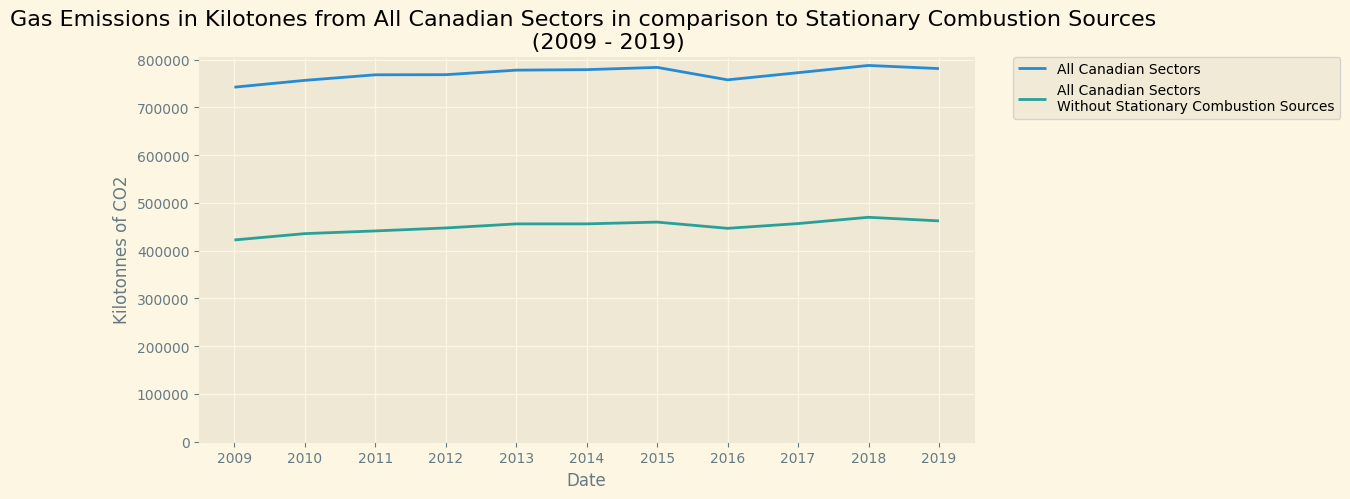

In [ ]:
# Creating Graph for comparing Canada All and Canada - Factory
# df_canada_vs_canada_no_factory
plt.style.use('default')

with plt.style.context('Solarize_Light2'):


  fig,axs = plt.subplots(figsize=(10,5))

  plt.xticks(range(2009,2020), range(2009,2020))

  ax_canada_vs_canada_no_factory = sns.lineplot(
      data=df_canada_vs_canada_no_factory,
      x='DATE',
      y='VALUE',
      hue='PROVINCE'
  )
  ax_canada_vs_canada_no_factory.set(
      xlabel='Date',
      ylabel='Kilotonnes of CO2',
      ylim=(0,None),
      title='''Gas Emissions in Kilotones from All Canadian Sectors in comparison to Stationary Combustion Sources 
      (2009 - 2019)'''
  )

  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="")
  #plt.legend(title='')

This is an other way to represent the same data.

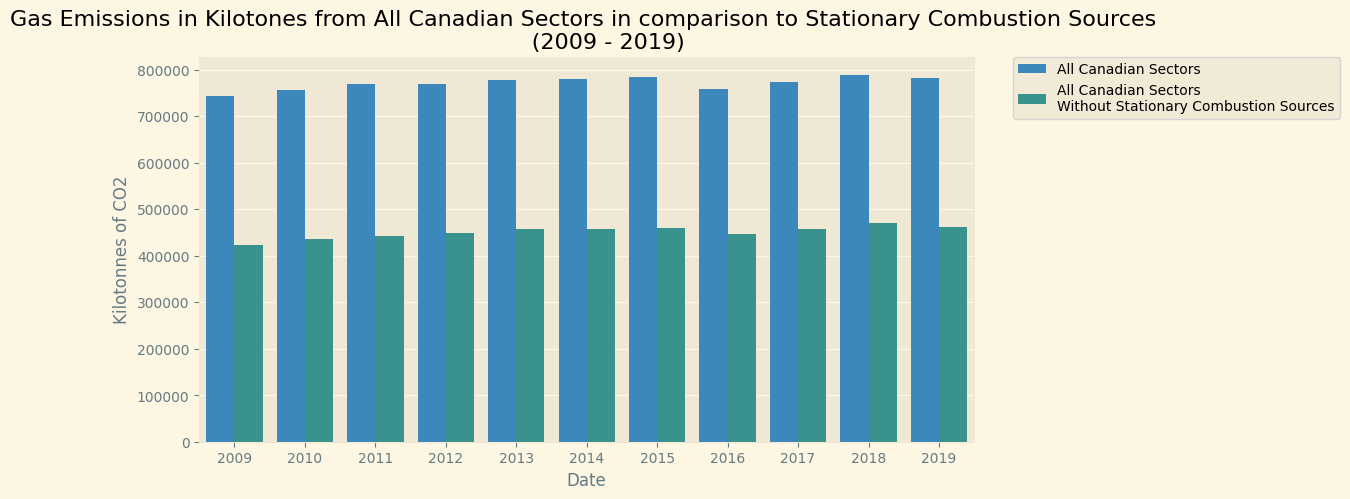

In [ ]:
# Creating Graph for comparing Canada All and Canada - Factory
# df_canada_vs_canada_no_factory
plt.style.use('default')

with plt.style.context('Solarize_Light2'):


  fig,axs = plt.subplots(figsize=(10,5))

  plt.xticks(range(2009,2020), range(2009,2020))

  ax_canada_vs_canada_no_factory = sns.barplot(
      data=df_canada_vs_canada_no_factory,
      x='DATE',
      y='VALUE',
      hue='PROVINCE'
  )
  ax_canada_vs_canada_no_factory.set(
      xlabel='Date',
      ylabel='Kilotonnes of CO2',
      ylim=(0,None),
    title='''Gas Emissions in Kilotones from All Canadian Sectors in comparison to Stationary Combustion Sources 
      (2009 - 2019)'''
      )

  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="")
  #plt.legend(title='')

This is the graph of the emission of Canada

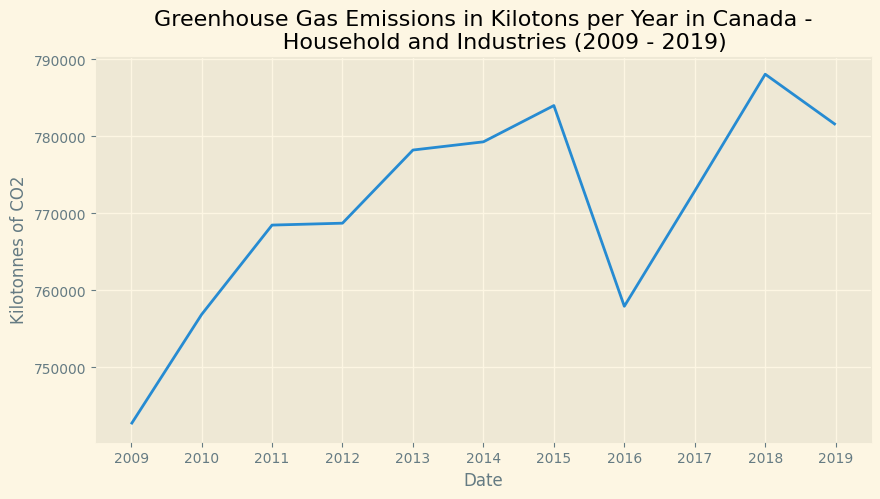

In [ ]:
# Creating Graph of Greenhouse Canada all
# df_greenhouse_final_canada_all
plt.style.use('default')
with plt.style.context('Solarize_Light2'):

  fig,axs = plt.subplots(figsize=(10,5))


  ax_greenhouse_final_canada_all = sns.lineplot(
      data=df_greenhouse_final_canada_all,
      x='DATE',
      y='VALUE',
      
  )

  plt.xticks(range(2009,2020), range(2009,2020))


  ax_greenhouse_final_canada_all.set(
      xlabel='Date',
      ylabel='Kilotonnes of CO2',
      title='''Greenhouse Gas Emissions in Kilotons per Year in Canada -
      Household and Industries (2009 - 2019)''',
      
  )



This is the graph of the HouseHold emission.

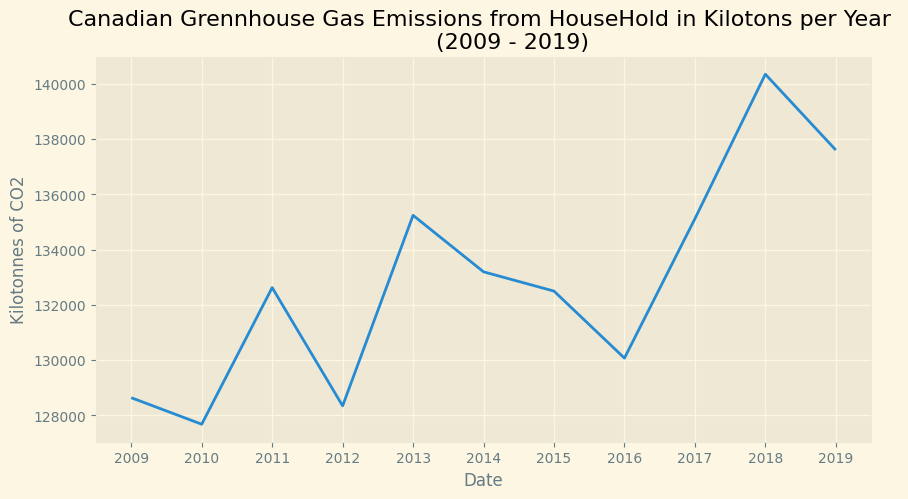

In [ ]:
# Creating Graph of HouseHold Canada all
# df_greenhouse_final_canada_population
plt.style.use('default')
with plt.style.context('Solarize_Light2'):

  fig,axs = plt.subplots(figsize=(10,5))

  plt.xticks(range(2009,2020), range(2009,2020))

  ax_greenhouse_final_canada_population = sns.lineplot(
      data=df_greenhouse_final_canada_population,
      x='DATE',
      y='VALUE'
  )
  ax_greenhouse_final_canada_population.set(
      xlabel='Date',
      ylabel='Kilotonnes of CO2',
      title='''Canadian Grennhouse Gas Emissions from HouseHold in Kilotons per Year 
        (2009 - 2019)''',
      
  )

This is the emission of the Stationary Combustion Sources industry.

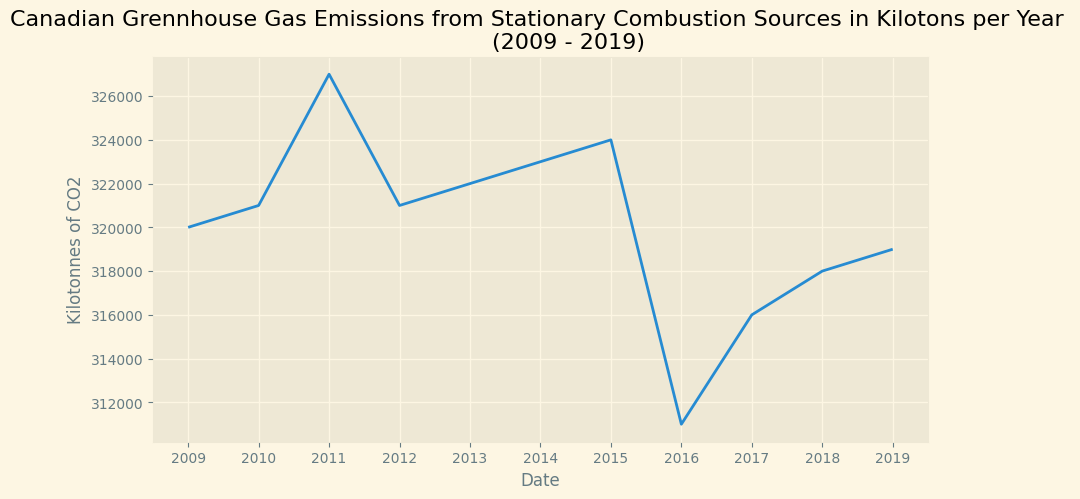

In [ ]:
# Creating Graph of Stationary Combustion Sources industry
# df_factory_final
plt.style.use('default')

with plt.style.context('Solarize_Light2'):


  fig,axs = plt.subplots(figsize=(10,5))

  plt.xticks(range(2009,2020), range(2009,2020))

  ax_factory_final = sns.lineplot()

  ax_factory_final = sns.lineplot(
      data=df_factory_final,
      x='DATE',
      y='VALUE',
  
  )
  ax_factory_final.set(
      xlabel='Date',
      ylabel='Kilotonnes of CO2',
      title='''Canadian Grennhouse Gas Emissions from Stationary Combustion Sources in Kilotons per Year 
        (2009 - 2019)'''
  )

  

This graph was only to visualize the data that was computed of the difference of the canada and industry.

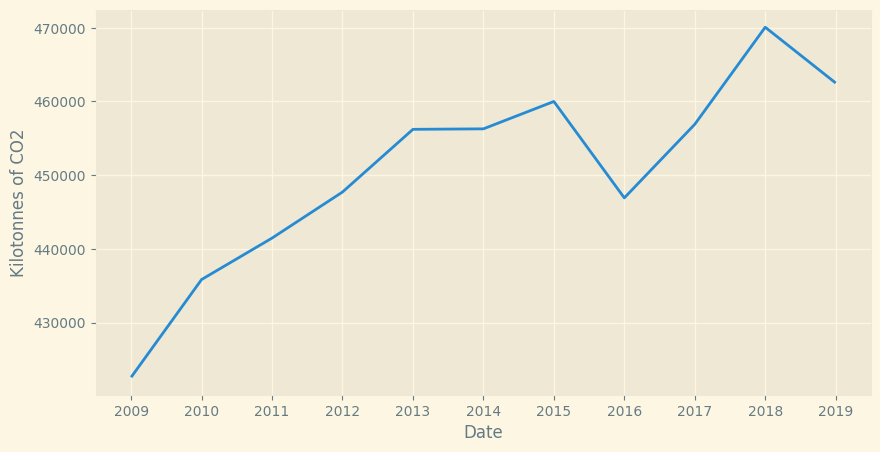

In [ ]:
# Creating Graph of Canada - Industry
# df_greenhouse_final_canada_all
plt.style.use('default')
with plt.style.context('Solarize_Light2'):

  fig,axs = plt.subplots(figsize=(10,5))

  plt.xticks(range(2009,2020), range(2009,2020))

  ax_canada_factory = sns.lineplot(
      data=df_canada_factory,
      x='DATE',
      y='VALUE'
  )
  ax_canada_factory.set(
      xlabel='Date',
      ylabel='Kilotonnes of CO2'
  )

This is the emission of each provinces and territory displayed in a graph.

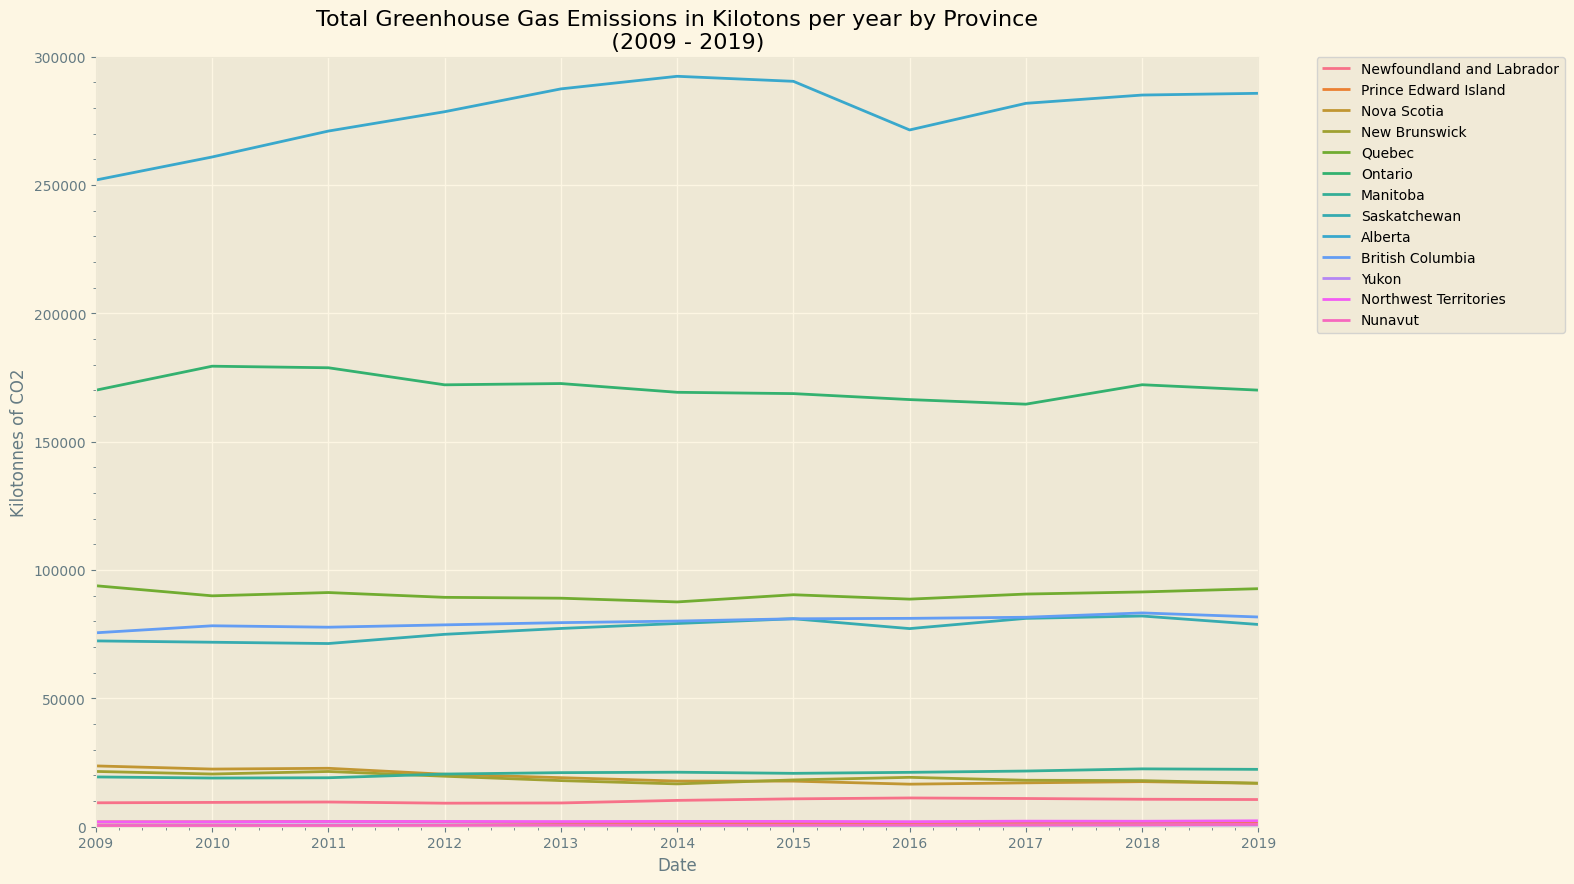

In [ ]:
# Creating Graph of Greenhouse Canada all
# df_greenhouse_final_canada_all
plt.style.use('default')

with plt.style.context('Solarize_Light2'):
  fig,axs = plt.subplots(figsize=(15,10))

  ax_greenhouse_final_provinces_all = sns.lineplot(
      data=df_greenhouse_final_provinces,
      x='DATE',
      y='VALUE',
      hue="PROVINCE" 
    
  )
  ax_greenhouse_final_provinces_all.set(
      xlabel='Date',
      ylabel='Kilotonnes of CO2',

  )
  plt.xlim(2009, 2019)
  plt.ylim(0, 300000)
  plt.minorticks_on()
  plt.title('''Total Greenhouse Gas Emissions in Kilotons per year by Province
   (2009 - 2019)''')

  plt.xticks(range(2009,2020), range(2009,2020))
  #ax_greenhouse_final_provinces_all.set_xticks(range(10), labels=range(2009, 2019))


  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
  #plt.legend(loc='center right')


This graph shows how much the industries change the previous graph.

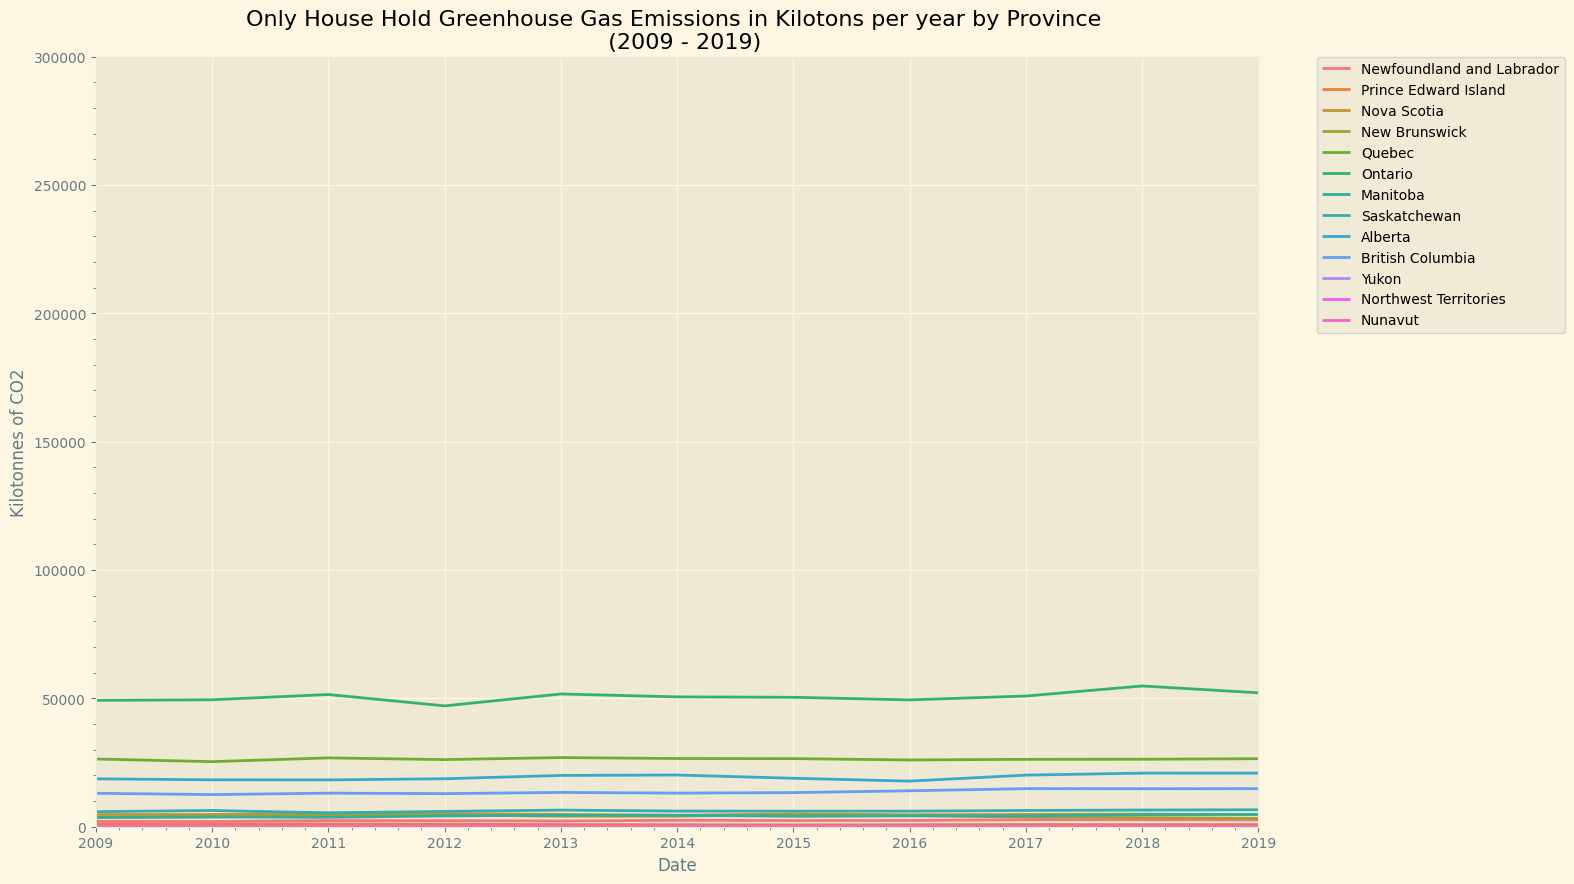

In [ ]:
# Creating Graph of Greenhouse Canada all
# df_greenhouse_final_canada_all
plt.style.use('default')

with plt.style.context('Solarize_Light2'):
  fig,axs = plt.subplots(figsize=(15,10))

  ax_greenhouse_final_provinces_houses = sns.lineplot(
      data=df_greenhouse_provinces_house,
      x='DATE',
      y='VALUE',
      hue="PROVINCE"
      

  )

  plt.title('''Only House Hold Greenhouse Gas Emissions in Kilotons per year by Province 
  (2009 - 2019)''')
  plt.xlim(2009, 2019)
  plt.ylim(0, 300000)
  #ax_greenhouse_final_provinces_houses.set_xticks(range(8))
  #ax_greenhouse_final_provinces_houses.set_xticklabels(['2011', '2012', '2013', '2014','2015', '2016', '2017', '2018'])
  plt.xticks([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

  plt.minorticks_on()

  ax_greenhouse_final_provinces_houses.set(
      xlabel='Date',
      ylabel='Kilotonnes of CO2'

  )

  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


Creating Data Frame of all industries.

In [ ]:
# Creating Data Frame for Factory
factory_path = '/content/drive/MyDrive/DawsCon2023DJC/gas_emissions_for_energy_all_industries.csv'

df_factory_final_all = pd.read_csv(factory_path)

# Table
df_factory_final_all = df_factory_final_all.rename(columns={"INDUSTRY" : "LABEL"})
df_factory_final_all

,DATE,LABEL,VALUE,UNIT
0,2006,Stationary Combustion Sources,333000,Kilotonne
1,2007,Stationary Combustion Sources,354000,Kilotonne
2,2008,Stationary Combustion Sources,342000,Kilotonne
3,2009,Stationary Combustion Sources,320000,Kilotonne
4,2010,Stationary Combustion Sources,321000,Kilotonne
5,2011,Stationary Combustion Sources,327000,Kilotonne
6,2012,Stationary Combustion Sources,321000,Kilotonne
7,2013,Stationary Combustion Sources,322000,Kilotonne
8,2014,Stationary Combustion Sources,323000,Kilotonne
9,2015,Stationary Combustion Sources,324000,Kilotonne


Format the df_transport Data Frame.

In [ ]:
# Creating the individual dataframes that represent the sources of GHG from 
# Specific sectors of energy production

# All indexes are reset so that the dataframes can be more easily summed

df_transport = df_factory_final_all.loc[
    (df_factory_final_all['LABEL'] == 'Transport')
    &
    (df_factory_final_all['DATE'].isin(range(2009,2019)))  
    ]


df_combustion = df_factory_final_all.loc[
    (df_factory_final_all['LABEL'] == 'Stationary Combustion Sources')
    &
    (df_factory_final_all['DATE'].isin(range(2009,2019)))  
    ]
df_combustion = df_combustion.reset_index()

df_fugitive = df_factory_final_all.loc[
    (df_factory_final_all['LABEL'] == 'Fugitive Sources')
    &
    (df_factory_final_all['DATE'].isin(range(2009,2019)))  
    ]
df_fugitive = df_fugitive.reset_index()

df_not_canada = df_factory_final_all.loc[
    (df_factory_final_all['LABEL'] != 'Canada')
    &
    (df_factory_final_all['DATE'].isin(range(2009,2019)))  
    ]
df_transport = df_transport.reset_index()

Changing the data strucure of df_transport

In [ ]:
# Adding the values of the Industries so that they are stacked ontop of each other instead of infront
# Done purely for graphing purposes.
# example of subtraction :
# df_number = df_greenhouse_final_canada_all['VALUE'].subtract(df_factory_final['VALUE'])


df_transport['WITH COMBUSTION'] = df_transport['VALUE'].add(df_combustion['VALUE'])


df_fugitive['WITH COMBUSTION TRANSPORT'] = df_fugitive['VALUE'].add(df_transport['WITH COMBUSTION'])

Creating the graph For the industries emission.

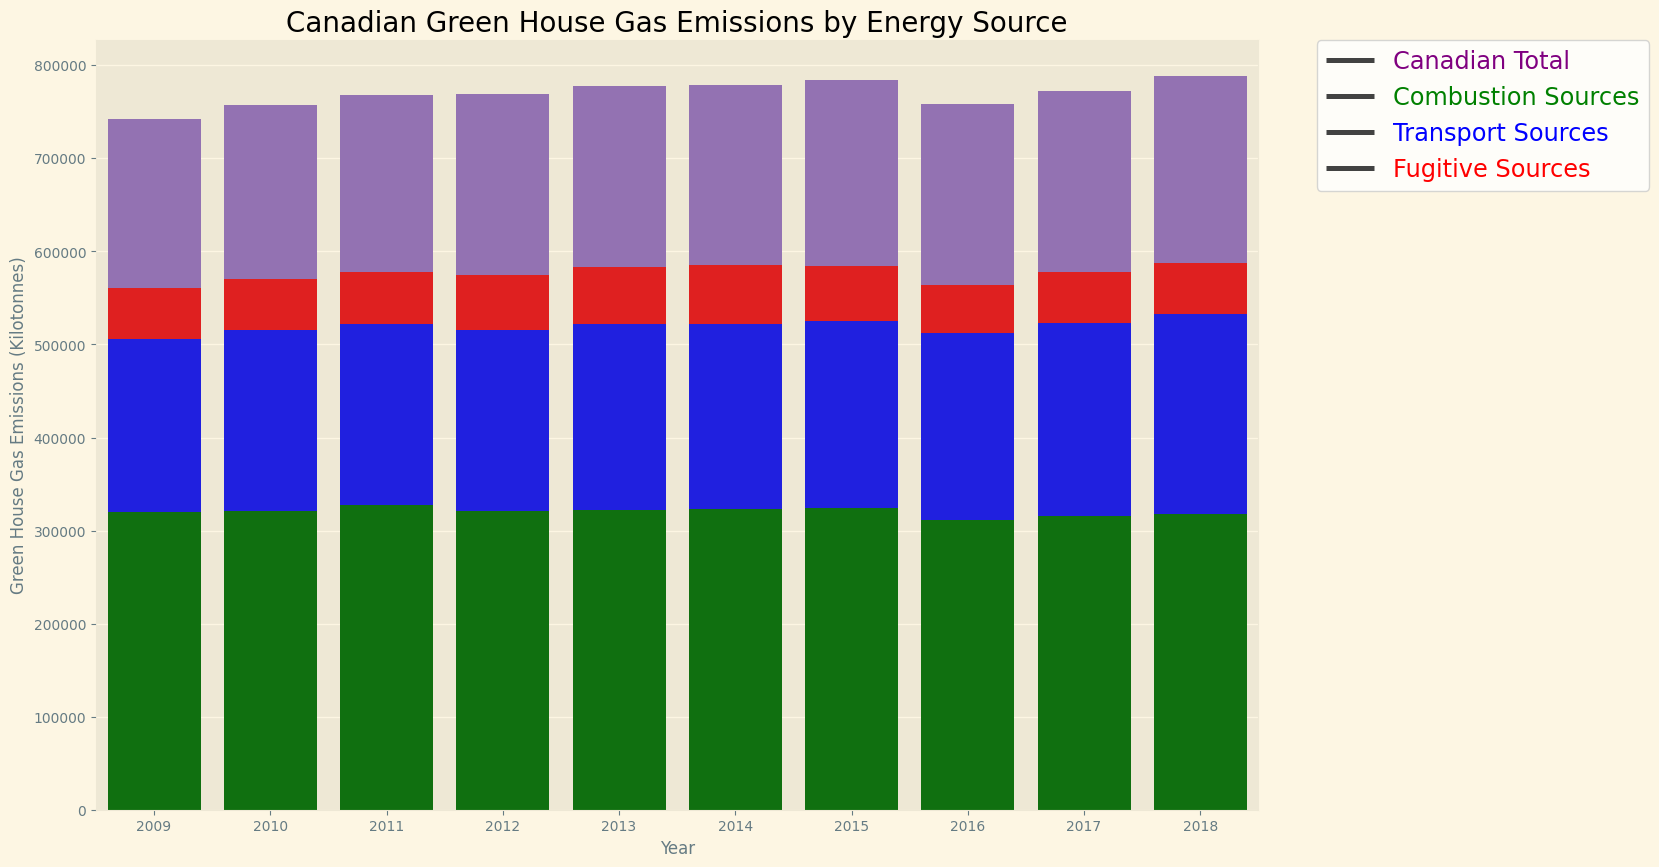

In [ ]:
# Creation of the graph that demonstrates the GHG values per sector compared to
# the total GHG emimissions from Canada (proportionally)

with plt.style.context('Solarize_Light2'):
  fig,axs = plt.subplots(figsize=(15,10))

  ax = sns.barplot(x=df_greenhouse_final_canada_all['DATE'], y=df_greenhouse_final_canada_all['VALUE'], color='tab:purple')
  ax = sns.barplot(x=df_fugitive['DATE'], y=df_fugitive['WITH COMBUSTION TRANSPORT'], color='r')
  ax = sns.barplot(x=df_transport['DATE'], y=df_transport['WITH COMBUSTION'], color='b')
  ax = sns.barplot(x=df_combustion['DATE'], y=df_combustion['VALUE'], color='g')
  ax.set(
      ylabel='Green House Gas Emissions (Kilotonnes)',
      xlabel='Year',
      )
plt.title('Canadian Green House Gas Emissions by Energy Source', fontsize=20)
plt.legend(labels=['Canadian Total', 'Combustion Sources', 'Transport Sources', 'Fugitive Sources'],
           labelcolor=['Purple', 'Green', 'Blue', 'Red'],
           bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize='xx-large')  
plt.show()